In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

import datetime as dt

%matplotlib inline

In [2]:
# Enter the begin and end dates for the gage and flow data

begin_date = '2023-01-01T00:00:00.000-05:00'
end_date = '2024-10-21T18:00:00.000-05:00'

#08393610 - Rio Hondo, Roswell NM

In [3]:
#Read in raw stream gage data
gage = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=08393610&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=27)
gage = gage.iloc[1: , :]

In [4]:
gage

,agency_cd,site_no,datetime,tz_cd,101398_00065,101398_00065_cd
1,USGS,08393610,2022-12-31 23:00,MST,6.21,A
2,USGS,08393610,2022-12-31 23:15,MST,6.20,A
3,USGS,08393610,2022-12-31 23:30,MST,6.19,A
4,USGS,08393610,2022-12-31 23:45,MST,6.20,A
5,USGS,08393610,2023-01-01 00:00,MST,6.18,A
...,...,...,...,...,...,...
62027,USGS,08393610,2024-10-21 16:00,MDT,9.32,P
62028,USGS,08393610,2024-10-21 16:15,MDT,9.40,P
62029,USGS,08393610,2024-10-21 16:30,MDT,9.36,P
62030,USGS,08393610,2024-10-21 16:45,MDT,9.36,P


In [5]:
gage['101398_00065'] = gage['101398_00065'].astype(float)
gage = gage[['datetime','101398_00065']]
gage = gage.set_index('datetime')
gage['item_id'] = 'gage'
gage  = gage.rename(columns={"101398_00065": "series"})
gage.head()

,series,item_id
datetime,,
2022-12-31 23:00,6.21,gage
2022-12-31 23:15,6.20,gage
2022-12-31 23:30,6.19,gage
2022-12-31 23:45,6.20,gage
2023-01-01 00:00,6.18,gage


In [6]:
#Read in raw flow data
flow = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=08393610&parameterCd=00060&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=28)
flow = flow.iloc[1: , :]

In [7]:
flow

,agency_cd,site_no,datetime,tz_cd,101399_00060,101399_00060_cd
1,USGS,08393610,2022-12-31 23:00,MST,9.62,A
2,USGS,08393610,2022-12-31 23:15,MST,9.39,A
3,USGS,08393610,2022-12-31 23:30,MST,9.16,A
4,USGS,08393610,2022-12-31 23:45,MST,9.39,A
5,USGS,08393610,2023-01-01 00:00,MST,8.94,A
...,...,...,...,...,...,...
62179,USGS,08393610,2024-10-21 16:00,MDT,206,P
62180,USGS,08393610,2024-10-21 16:15,MDT,216,P
62181,USGS,08393610,2024-10-21 16:30,MDT,211,P
62182,USGS,08393610,2024-10-21 16:45,MDT,211,P


In [8]:
flow['101399_00060'] = flow['101399_00060'].astype(float)
flow = flow[['datetime','101399_00060']]# Merge datasets together on datetime index and check if everything is good
flow = flow.set_index('datetime')
flow['item_id'] = 'flow'

            
#df=pd.merge(gage, flow, how='inner', left_index=True, right_index=True)
#df.head()
flow  = flow.rename(columns={"101399_00060": "series"})

flow.head()

,series,item_id
datetime,,
2022-12-31 23:00,9.62,flow
2022-12-31 23:15,9.39,flow
2022-12-31 23:30,9.16,flow
2022-12-31 23:45,9.39,flow
2023-01-01 00:00,8.94,flow


In [9]:
merge = pd.concat([gage, flow])

In [10]:
merge

,series,item_id
datetime,,
2022-12-31 23:00,6.21,gage
2022-12-31 23:15,6.20,gage
2022-12-31 23:30,6.19,gage
2022-12-31 23:45,6.20,gage
2023-01-01 00:00,6.18,gage
...,...,...
2024-10-21 16:00,206.00,flow
2024-10-21 16:15,216.00,flow
2024-10-21 16:30,211.00,flow


In [11]:
df = merge.reset_index()

In [12]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :" duplicate.count())

Duplicate Rows :


In [13]:
df.drop_duplicates(subset=duplicate, inplace=True) #, 

In [14]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [15]:
df = df.set_index('datetime')

In [16]:
df.reset_index(inplace=True)

In [17]:
df

,datetime,series,item_id
0,2022-12-31 23:00:00,6.21,gage
1,2022-12-31 23:15:00,6.20,gage
2,2022-12-31 23:30:00,6.19,gage
3,2022-12-31 23:45:00,6.20,gage
4,2023-01-01 00:00:00,6.18,gage
...,...,...,...
124209,2024-10-21 16:00:00,206.00,flow
124210,2024-10-21 16:15:00,216.00,flow
124211,2024-10-21 16:30:00,211.00,flow
124212,2024-10-21 16:45:00,211.00,flow


In [18]:
train_data = TimeSeriesDataFrame.from_data_frame(df, id_column="item_id", timestamp_column='datetime') #, timestamp_column=merge.index
train_data.head()


series
item_id timestamp                  
gage    2022-12-31 23:00:00    6.21
        2022-12-31 23:15:00    6.20
        2022-12-31 23:30:00    6.19
        2022-12-31 23:45:00    6.20
        2023-01-01 00:00:00    6.18

In [19]:
#test_data.head()

In [20]:
train_data = train_data.convert_frequency(freq='h', agg_numeric="max")

In [21]:
train_data.head()

series
item_id timestamp                  
gage    2022-12-31 23:00:00    6.21
        2023-01-01 00:00:00    6.19
        2023-01-01 01:00:00    6.18
        2023-01-01 02:00:00    6.17
        2023-01-01 03:00:00    6.15

In [22]:
prediction_length = 6 #this is for 6 hours
item_id = "gage"
train_data, test_data = train_data.train_test_split(prediction_length)

In [23]:
train_data

series
item_id timestamp                  
gage    2022-12-31 23:00:00    6.21
        2023-01-01 00:00:00    6.19
        2023-01-01 01:00:00    6.18
        2023-01-01 02:00:00    6.17
        2023-01-01 03:00:00    6.15
...                             ...
flow    2024-10-21 07:00:00  242.00
        2024-10-21 08:00:00  239.00
        2024-10-21 09:00:00  235.00
        2024-10-21 10:00:00  229.00
        2024-10-21 11:00:00  224.00

[31658 rows x 1 columns]

In [24]:
test_data

series
item_id timestamp                  
gage    2022-12-31 23:00:00    6.21
        2023-01-01 00:00:00    6.19
        2023-01-01 01:00:00    6.18
        2023-01-01 02:00:00    6.17
        2023-01-01 03:00:00    6.15
...                             ...
flow    2024-10-21 13:00:00  225.00
        2024-10-21 14:00:00  220.00
        2024-10-21 15:00:00  217.00
        2024-10-21 16:00:00  216.00
        2024-10-21 17:00:00  210.00

[31670 rows x 1 columns]

In [25]:
predictor = TimeSeriesPredictor(
    prediction_length=prediction_length,
    path="rio_hondo_gage_autogluon_"+str(prediction_length),
    target="series",
    eval_metric="RMSE",
)

predictor.fit(
    train_data,
    presets="high_quality",
    num_val_windows = 8,#
    time_limit=600,
)

Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to 'rio_hondo_gage_autogluon_6'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.14
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.6.0: Mon Jul 29 21:16:46 PDT 2024; root:xnu-10063.141.2~1/RELEASE_ARM64_T8112
CPU Count:          8
GPU Count:          0
Memory Avail:       5.31 GB / 16.00 GB (33.2%)
Disk Space Avail:   579.97 GB / 926.35 GB (62.6%)
Setting presets to: high_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': RMSE,
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 8,
 'prediction_length': 6,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'series',
 'time_limit': 600,
 'verbosity': 2}

Inferred time series f

In [26]:
predictions = predictor.predict(test_data)
predictions

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean         0.1         0.2         0.3  \
item_id timestamp                                                             
gage    2024-10-21 18:00:00    8.939202    8.620145    8.707623    8.772753   
        2024-10-21 19:00:00    8.923946    8.471752    8.607712    8.710008   
        2024-10-21 20:00:00    9.044859    8.411410    8.594735    8.706023   
        2024-10-21 21:00:00    9.021620    8.389092    8.508180    8.677388   
        2024-10-21 22:00:00    9.040301    8.303466    8.475414    8.646434   
        2024-10-21 23:00:00    9.015843    8.223706    8.426379    8.625783   
flow    2024-10-21 18:00:00  183.983150  103.230689  126.826007  144.222046   
        2024-10-21 19:00:00  183.711343   63.104452  100.567729  128.271359   
        2024-10-21 20:00:00  183.376631   23.199308   72.534587  102.781155   
        2024-10-21 21:00:00  192.863097   18.338623   50.774428   96.628928   
        2024-10-21 22:00:00  188.236141   -2.359466   44.330554   91.110504   
        2024-10-21 23:00:00  193.321174  -23.012809   32.920315   87.209873   

                                    0.4         0.5         0.6         0.7  \
item_id timestamp                                                             
gage    2024-10-21 18:00:00    8.857863    8.925112    8.998561    9.062913   
        2024-10-21 19:00:00    8.804239    8.887650    8.961622    9.063747   
        2024-10-21 20:00:00    8.850317    8.952461    9.083688    9.196217   
        2024-10-21 21:00:00    8.773038    8.863850    9.016332    9.181349   
        2024-10-21 22:00:00    8.776298    8.899997    9.044461    9.216132   
        2024-10-21 23:00:00    8.783467    8.982630    9.107090    9.250756   
flow    2024-10-21 18:00:00  167.504696  186.188605  206.241913  224.130875   
        2024-10-21 19:00:00  153.741469  176.923618  197.128648  225.512966   
        2024-10-21 20:00:00  142.101939  170.184575  206.263506  236.852624   
        2024-10-21 21:00:00  122.603128  147.605872  189.205972  234.628895   
        2024-10-21 22:00:00  126.188214  160.277280  200.087195  247.043076   
        2024-10-21 23:00:00  130.353418  184.923016  219.267998  258.546485   

                                    0.8         0.9  
item_id timestamp                                    
gage    2024-10-21 18:00:00    9.135811    9.276082  
        2024-10-21 19:00:00    9.185966    9.398062  
        2024-10-21 20:00:00    9.337099    9.560559  
        2024-10-21 21:00:00    9.312104    9.498617  
        2024-10-21 22:00:00    9.353022    9.670467  
        2024-10-21 23:00:00    9.405416    9.729036  
flow    2024-10-21 18:00:00  244.052793  279.565354  
        2024-10-21 19:00:00  258.774994  304.547369  
        2024-10-21 20:00:00  275.235491  325.502880  
        2024-10-21 21:00:00  270.262414  318.477042  
        2024-10-21 22:00:00  284.055480  361.322896  
        2024-10-21 23:00:00  300.860593  391.286006

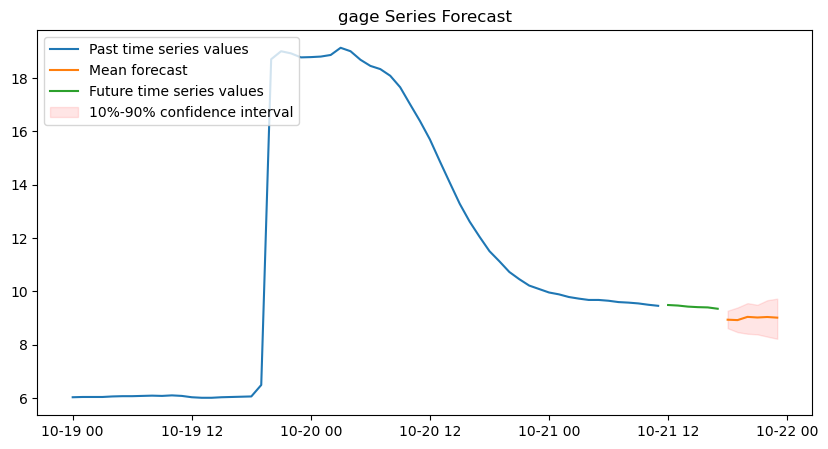

In [30]:
#test_data = predictions

item_id = 'gage'

plt.figure(figsize=(10, 5))
plt.title(item_id+' Series Forecast')

y_past = train_data.loc[item_id]["series"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["series"]

plt.plot(y_past[-60:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test[-prediction_length:], label="Future time series values")

plt.fill_between(y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval")
plt.legend(loc = 'upper left');
plt.savefig(item_id+'_forecast_'+str(prediction_length)+'.png')

In [28]:
y_pred[['mean', '0.1', '0.9']]

,mean,0.1,0.9
timestamp,,,
2024-10-21 18:00:00,8.939202,8.620145,9.276082
2024-10-21 19:00:00,8.923946,8.471752,9.398062
2024-10-21 20:00:00,9.044859,8.411410,9.560559
2024-10-21 21:00:00,9.021620,8.389092,9.498617
2024-10-21 22:00:00,9.040301,8.303466,9.670467
2024-10-21 23:00:00,9.015843,8.223706,9.729036


In [29]:
predictions.info()

<class 'autogluon.timeseries.dataset.ts_dataframe.TimeSeriesDataFrame'>
MultiIndex: 12 entries, ('gage', Timestamp('2024-10-21 18:00:00')) to ('flow', Timestamp('2024-10-21 23:00:00'))
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    12 non-null     float64
 1   0.1     12 non-null     float64
 2   0.2     12 non-null     float64
 3   0.3     12 non-null     float64
 4   0.4     12 non-null     float64
 5   0.5     12 non-null     float64
 6   0.6     12 non-null     float64
 7   0.7     12 non-null     float64
 8   0.8     12 non-null     float64
 9   0.9     12 non-null     float64
dtypes: float64(10)
memory usage: 1.4+ KB
